##Data Challenge

1. What metrics will you measure to evaluate the channel performance? How are the five
channels performing relative to one another?
2. What can you infer about the relative return on investment from the service types? What
might be driving the differences in results?
3. Where would you want more information before drawing conclusions? What additional
data would be most useful to you?

In [201]:
# for data manupulation
import pandas as pd
import numpy as np

# for Visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as md 
from matplotlib.dates import DateFormatter
%matplotlib inline 
import seaborn as sns

# for modeling
import statsmodels.api as sm 

import os

import warnings
warnings.filterwarnings('ignore')


In [202]:
# Importing data
df = pd.read_excel('Q4_Marketing_Channel_Performance.xlsx', sheetname ='Marketing Performance')
df.head()                   

,Channel,Service Type,Week Number,Ad Expense,Numer of Clicks,Number of Signups,Revenue
0,A,Cooking Classes,Week 04,2376.0,360,4,0
1,A,Cooking Classes,Week 05,2540.0,387,5,2864
2,A,Cooking Classes,Week 06,1000.0,143,3,152
3,A,Cooking Classes,Week 07,388.0,65,1,0
4,A,Cooking Classes,Week 08,400.0,68,0,0


In [203]:
df.rename(columns ={'Ad Expense':'Ad_Expense','Numer of Clicks':'Num_Clicks','Service Type':'Service_Type','Number of Signups':'Num_Signup','Revenue ':'Revenue'}, inplace = True)
df.head()



,Channel,Service_Type,Week Number,Ad_Expense,Num_Clicks,Num_Signup,Revenue
0,A,Cooking Classes,Week 04,2376.0,360,4,0
1,A,Cooking Classes,Week 05,2540.0,387,5,2864
2,A,Cooking Classes,Week 06,1000.0,143,3,152
3,A,Cooking Classes,Week 07,388.0,65,1,0
4,A,Cooking Classes,Week 08,400.0,68,0,0


In [204]:
df.Service_Type.unique()

array(['Cooking Classes', 'Local Movers', 'Personal Chef', 'Lawn Mowing',
       'Interior Painting', 'Carpet Cleaning', 'Personal Vocal Classes',
       'General Contracting', 'Graphic Design', 'Handyman',
       'Tax Preparation', 'Landscaping', 'Makeup Artist',
       'Massage Therapy', 'Personal Training', 'Party Rental Supplies',
       'Photography', 'Plumbing Pipe Repair', 'Logo Design',
       'Dog Training'], dtype=object)

In [205]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Service_Type'] = le.fit_transform(df.Service_Type.values)
df.Service_Type.unique()

array([ 1,  9, 14,  8,  6,  0, 16,  3,  4,  5, 19,  7, 11, 12, 15, 13, 17,
       18, 10,  2])

In [206]:
list(le.inverse_transform([18,19,8,7,9,12]))

['Plumbing Pipe Repair',
 'Tax Preparation',
 'Lawn Mowing',
 'Landscaping',
 'Local Movers',
 'Massage Therapy']

In [207]:
df.dtypes

Channel          object
Service_Type      int64
Week Number      object
Ad_Expense      float64
Num_Clicks        int64
Num_Signup       object
Revenue           int64
dtype: object

In [208]:
df.Num_Signup.unique()

array([4, 5, 3, 1, 0, 9, 8, 6, 7, 2, 11, 26, 18, 67, 37, 29, 15, 32, 30,
       59, 68, 69, 93, 63, 35, 12, 13, 16, 10, 97, 189, 139, 100, 86, 77,
       76, 57, 43, 72, 56, 64, 65, 28, 31, 21, 23, 40, 70, 53, 42, 60, 36,
       82, 73, 25, 20, 27, 51, 79, 44, 17, 19, 175, 948, 1270, 954, 709,
       524, 600, 594, 828, 530, 700, 374, 499, 602, 1331, 1052, 420, 304,
       220, 149, 118, 89, 201, 137, 166, 119, 161, 84, 114, 160, 186, 225,
       199, 339, 773, 896, 639, 413, 103, 245, 310, 218, 174, 145, 138,
       106, 47, 127, 544, 456, 331, 231, 177, 14, 39, 54, 46, 38, 24, 41,
       22, 33, 50, 34, 83, 62, 52, 91, 48, 152, 150, 154, 113, 112, 95,
       101, 290, 289, 224, 221, 185, 102, 45, 49, 216, 303, 131, 123, 125,
       164, 215, 129, 248, 71, 85, 80, 55, 66, 74, 110, 262, 196, 192,
       142, 87, 88, 75, 180, 146, 144, 223, 301, 153, 121, 109, 81, 866,
       782, 701, 1355, 946, 854, 640, 228, 117, 94, 61, 90, 'jg'],
      dtype=object)

In [209]:
df.Num_Signup = df.Num_Signup.replace('jg', 0)

In [210]:
df.describe()

,Service_Type,Ad_Expense,Num_Clicks,Num_Signup,Revenue
count,999.000000,998.000000,999.000000,999.000000,999.000000
mean,8.968969,3038.729459,1862.069069,56.122122,3838.962963
std,5.324918,6315.799834,4447.541999,137.643942,12596.386912
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,360.000000,186.000000,6.000000,240.000000
50%,9.000000,814.000000,711.000000,19.000000,1032.000000
75%,13.000000,2243.000000,1612.000000,44.000000,2922.000000
max,19.000000,59380.000000,49225.000000,1355.000000,185744.000000


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 7 columns):
Channel         999 non-null object
Service_Type    999 non-null int64
Week Number     999 non-null object
Ad_Expense      998 non-null float64
Num_Clicks      999 non-null int64
Num_Signup      999 non-null int64
Revenue         999 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 54.7+ KB


In [212]:
#sns.jointplot(x = 'Service Type', y = 'Revenue',data = df)

In [213]:
dfg = df.groupby('Channel').sum()

In [214]:
df_service = df.groupby('Service_Type').mean()

In [215]:
df_service.head()

,Ad_Expense,Num_Clicks,Num_Signup,Revenue
Service_Type,,,,
0,262.800000,522.775000,1.550000,117.300000
1,299.567568,204.972973,4.162162,470.162162
2,1623.520000,671.786667,15.413333,1749.493333
3,1543.282051,925.769231,23.897436,980.717949
4,603.225806,875.516129,40.774194,1650.064516


In [216]:
df_service = df_service.reset_index()

In [217]:
df_service.head()

,Service_Type,Ad_Expense,Num_Clicks,Num_Signup,Revenue
0,0,262.800000,522.775000,1.550000,117.300000
1,1,299.567568,204.972973,4.162162,470.162162
2,2,1623.520000,671.786667,15.413333,1749.493333
3,3,1543.282051,925.769231,23.897436,980.717949
4,4,603.225806,875.516129,40.774194,1650.064516


In [218]:
df_service['Investment_Profit'] = df_service['Revenue'] - df_service['Ad_Expense']

In [219]:
df_service.head()

,Service_Type,Ad_Expense,Num_Clicks,Num_Signup,Revenue,Investment_Profit
0,0,262.800000,522.775000,1.550000,117.300000,-145.500000
1,1,299.567568,204.972973,4.162162,470.162162,170.594595
2,2,1623.520000,671.786667,15.413333,1749.493333,125.973333
3,3,1543.282051,925.769231,23.897436,980.717949,-562.564103
4,4,603.225806,875.516129,40.774194,1650.064516,1046.838710


In [220]:
dfg.head()

,Service_Type,Ad_Expense,Num_Clicks,Num_Signup,Revenue
Channel,,,,,
A,367,65628.0,11419,370,33112
B,2756,837588.0,975008,24880,1388432
C,2752,232816.0,476935,7565,436668
D,1655,1738508.0,376622,21170,1756320
E,1430,158112.0,20223,2081,220592


Question number 1 : 
a) What metrics will you measure to evaluate the channel performance? 
    
b) How are the five channels performing relative to one another?

dfg.columns.tolist()

In [221]:
dfg['Profit'] = dfg['Revenue'] - dfg['Ad_Expense'] 

In [222]:
dfg['Sign_up_rate'] = dfg['Num_Signup'] / dfg['Num_Clicks'] *100

In [223]:
dfg.head()

,Service_Type,Ad_Expense,Num_Clicks,Num_Signup,Revenue,Profit,Sign_up_rate
Channel,,,,,,,
A,367,65628.0,11419,370,33112,-32516.0,3.240214
B,2756,837588.0,975008,24880,1388432,550844.0,2.551774
C,2752,232816.0,476935,7565,436668,203852.0,1.586170
D,1655,1738508.0,376622,21170,1756320,17812.0,5.621021
E,1430,158112.0,20223,2081,220592,62480.0,10.290264


In [224]:
dfg = dfg.reset_index()

In [225]:
A = {'A': 1, "B": 2, 'C':3,'D':4,'E':5}
dfg['Channel'] = dfg.Channel.replace(A)


In [226]:
dfg.head()

,Channel,Service_Type,Ad_Expense,Num_Clicks,Num_Signup,Revenue,Profit,Sign_up_rate
0,1,367,65628.0,11419,370,33112,-32516.0,3.240214
1,2,2756,837588.0,975008,24880,1388432,550844.0,2.551774
2,3,2752,232816.0,476935,7565,436668,203852.0,1.586170
3,4,1655,1738508.0,376622,21170,1756320,17812.0,5.621021
4,5,1430,158112.0,20223,2081,220592,62480.0,10.290264


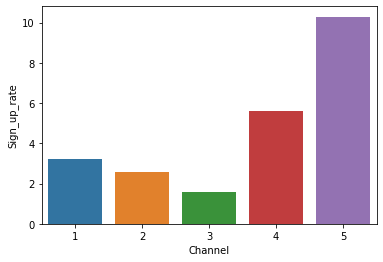

In [227]:

sns.barplot(x = 'Channel', y = 'Sign_up_rate', data = dfg)

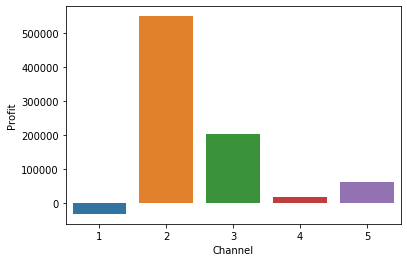

In [228]:
sns.barplot(x = 'Channel', y = 'Profit', data = dfg)

#Channel Performance: 
To evaluate Channel Performance, I would calculate Profit (Revenue - Expense) and Sign up rates and   
create a bar chart with respect to all five Channels. 
Eventhough the sign up rates are higher in channel 4 & 5, Profit is higher in Channel 2 and 3
which suggest deeper analysis into these factors. A customer segmentation Analysis is required to draw into
any conclusion. Also, profit by Channel 1 is in negative so may be we should reconsider investing more on Channel one.

##Q4:2


In [229]:
#Q4:2
df_service.head()

,Service_Type,Ad_Expense,Num_Clicks,Num_Signup,Revenue,Investment_Profit
0,0,262.800000,522.775000,1.550000,117.300000,-145.500000
1,1,299.567568,204.972973,4.162162,470.162162,170.594595
2,2,1623.520000,671.786667,15.413333,1749.493333,125.973333
3,3,1543.282051,925.769231,23.897436,980.717949,-562.564103
4,4,603.225806,875.516129,40.774194,1650.064516,1046.838710


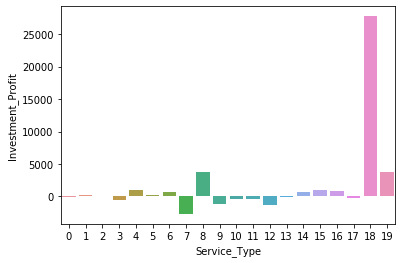

In [230]:
# Q4:2

sns.barplot(x = 'Service_Type', y = 'Investment_Profit', data = df_service)

#Return on Investment based on Service Type: 
Plumbing Pipe Repair(18) has the highest return in investment followed by Tax Preparation(19) and 
Lawn Mowing(8). Where as Landscaping(7), Local Movers(9) and Massage Therapy(12) has negative return in
investment. Further analysis of location, demographic and customer sehmentation analysis is required to make 
further insights.

#Part 4,Q3:
To darw any conclusion we should collect more data for Channel Performance and investment on advertisement. 
We should also look into client demographics,geographic locations, seasonality, time of the day, income,  log in devices and profession which will help us to 
understant the client and further invest on advertisement nased on those results.

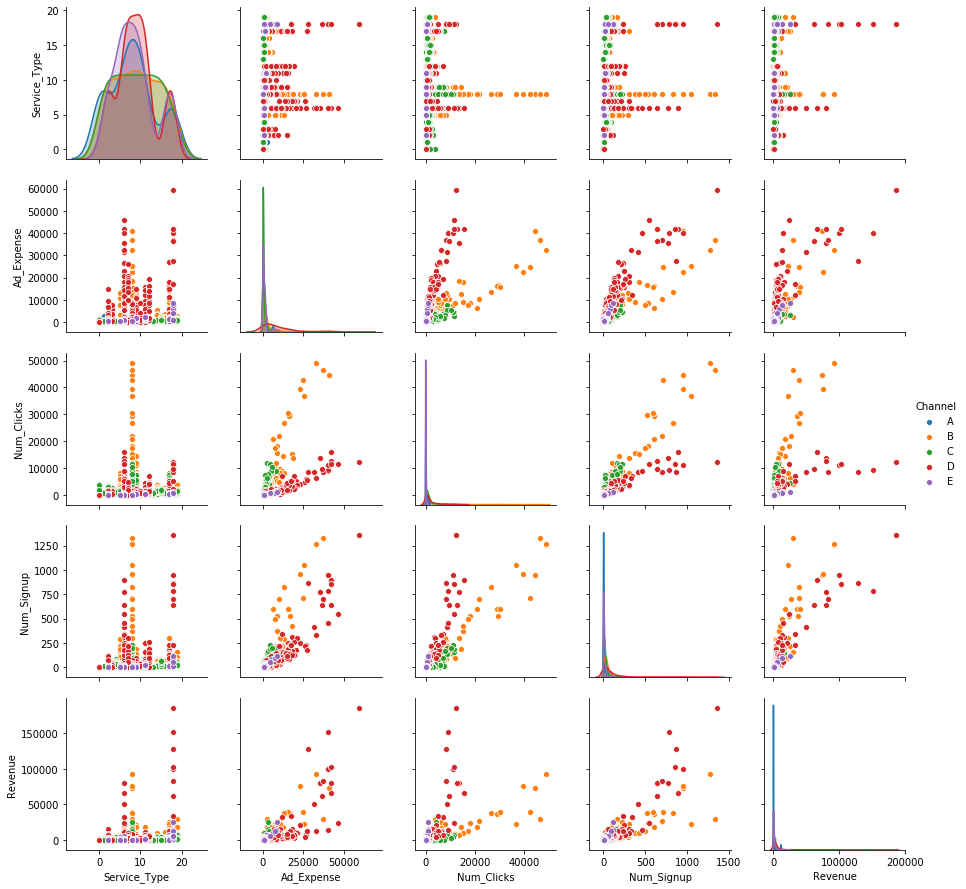

In [235]:
sns.pairplot(df, hue = 'Channel')

##Thank you for providing this opportunity !!